<a href="https://colab.research.google.com/github/scadriano/lia1_2024_2/blob/main/Construindo%20Modelo%20com%20TensorFlow/Construindo_um_modelo_com_TensorFlow_Dogs%26Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um Modelo com Tensorflow -  🐶 🐱!**

*Aluno: Rodrigo de Oliveira Ribeiro - Projeto LIA*

**Problema: uma imagem, dizer se é um dog ou um cat.**

Computer Vision; Deep Learning; Machine Learning; Artificial Inteligence! Nada disso faz sentido sem dados, muitos dados (Big Data! 🚀). Para isso, teremos:

* **Treinamento**: 25.000 imagens nomeadas: 12.500 de dogs e 12.500 de cats.
* **Teste**: 1.000 imagens de dogs e cats.

Usa-se os dados de treino para treinar o algoritmo e então criar o modelo preditivo. Usa-se os dados de teste para confirmar o desempenho do modelo preditivo já treinado, ou seja, apresenta-se ao modelo preditivo dados que ele não viu durante o treinamento, a fim de garantir que ele seja capaz de fazer previsões.

Por fim, o modelo de duas camadas de convolução seguidas de pooling, a camada de flattening, e as camadas totalmente conectadas (Dense), com a função de ativação sigmoid para a saída binária.

**Não há mágica. Há matemática!** 🧙

**Fonte de dados**

O Kaggle oferece diversos datasets públicos que podem ser usados para você desenvolver seus projetos e incluir no seu portfólio, uma excelente forma de demonstrar suas habilidades em Data Science e Machine Learning. Usaremos como fonte de dados, o famoso [dataset Dogs and Cats](https://www.kaggle.com/c/dogs-vs-cats/data).

**Carregando os dados de Treino e Teste**

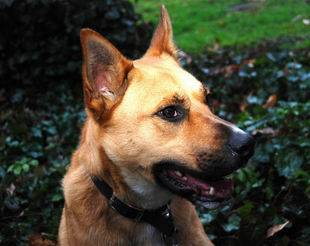

In [2]:
from IPython.display import Image

# Exibir imagem de um cachorro
Image(filename=r'R:/UFG/LIA/Modelo com TensorFlow/train/dogs/dog.251.jpg')

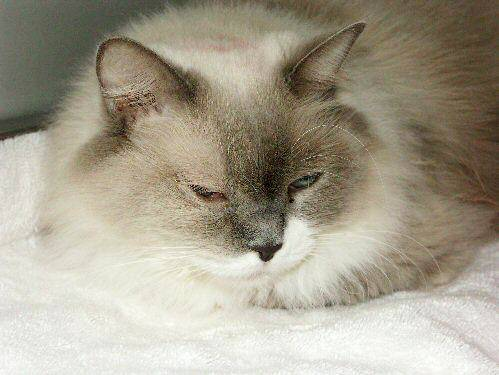

In [3]:
from IPython.display import Image

# Exibir imagem de um cachorro
Image(filename=r'R:/UFG/LIA/Modelo com TensorFlow/train/cats/cat.708.jpg')

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

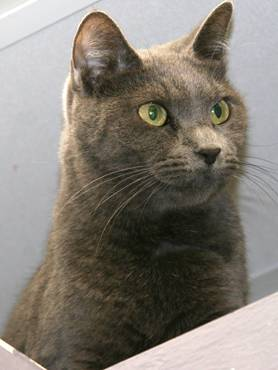

In [5]:
Image(filename = 'R:/UFG/LIA/Modelo com TensorFlow/test1//test1/11.jpg')

**Construindo a Rede Neural Convolucional**

O Keras é uma biblioteca do TensorFlow.

In [6]:
%pip install tensorflow
import tensorflow as tf

Note: you may need to restart the kernel to use updated packages.


In [7]:
import keras as K

In [8]:
# Importar K e suas funções necessárias
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [9]:
# Inicializando a Rede Neural Convolucional
classifier = Sequential()

In [10]:
# 32 features; formato 3x3; Imagens 64x64; Array 3D (RGB).

# Adicionando a Primeira Camada de Convolução
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adicionando a Segunda Camada de Convolução
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening - Transformando em 1D
classifier.add(Flatten())

# Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compilando a rede
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

c:\Users\Rodrigo Oliveira\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Pré-processamento**

Fazer pré-processamento nos dados, em nosso caso as imagens.

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Criar o objeto com as regras de pré-processamento
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [12]:
# Pré-processamento das imagens de treino
training_set = train_datagen.flow_from_directory(r'R:\UFG\LIA\Modelo com TensorFlow\train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')


Found 25000 images belonging to 2 classes.


**Treinamento do Modelo**

In [13]:
# Executando o treinamento
classifier.fit(training_set,
               steps_per_epoch=5,
               epochs=25)

Epoch 1/25


c:\Users\Rodrigo Oliveira\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 707ms/step - accuracy: 0.5718 - loss: 0.8040
Epoch 2/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 618ms/step - accuracy: 0.4959 - loss: 0.7332
Epoch 3/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 543ms/step - accuracy: 0.5253 - loss: 0.6905
Epoch 4/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 481ms/step - accuracy: 0.4733 - loss: 0.6962
Epoch 5/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 508ms/step - accuracy: 0.5146 - loss: 0.6931
Epoch 6/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 491ms/step - accuracy: 0.5082 - loss: 0.6928
Epoch 7/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 552ms/step - accuracy: 0.5064 - loss: 0.6919
Epoch 8/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 567ms/step - accuracy: 0.6223 - loss: 0.6924
Epoch 9/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 612ms/step - accuracy: 0.5226 - loss: 0.6926
Epoch 10/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 619ms/step - accuracy: 0.5485 - loss: 0.6906
Epoch 11/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - accuracy: 0.5523 - loss: 0.6893
Epoch 12/25
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 541ms/step - accuracy: 0.6392 - loss: 0.6881

Treinamento concluído com sucesso! 💪 Observe se ao final de cada época a acurácia aumenta.

**Teste do Modelo**

Testar o modelo treinado com imagens que ele ainda não viu. Por fim, verificamos o resultado da previsão e emitimos a informação se a imagem é de um gato ou cachorro.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Previsão: Cachorro.
Acurácia: 100.0 %.


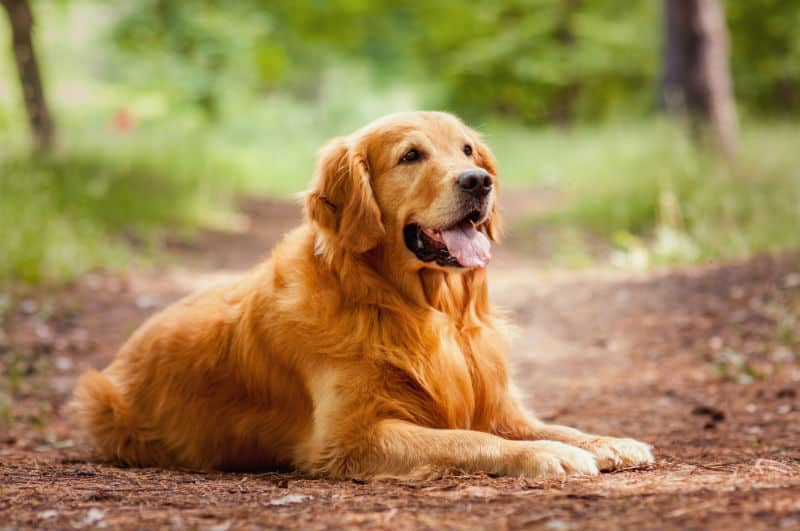

In [15]:
import numpy as np
from keras.preprocessing import image
from IPython.display import Image

# Carregando a imagem de teste
test_image = image.load_img(r'K:\OneDrive - Universidade Federal de Goiás\Área de Trabalho\Sem título.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Fazendo a previsão usando o modelo classifier
result = classifier.predict(test_image)
class_indices = training_set.class_indices

if result[0][0] > 0.5:
    prediction = 'Cachorro.'
    accuracy = round(result[0][0] * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1
else:
    prediction = 'Gato.'
    accuracy = round((1 - result[0][0]) * 100, 2)  # A saída de previsão é uma probabilidade entre 0 e 1

# Exibindo a previsão e a acurácia
print("Previsão:", prediction)
print("Acurácia:", accuracy, "%.")

# Exibindo a imagem
Image(filename= r'K:\Área de Trabalho\Sem título.jpg')


**O modelo recebeu uma imagem que nunca tinha visto antes e com base no que aprendeu durante o treinamento, foi capaz de classificar.**

Convertemos a imagem de teste em um vetor de pixels e apresentamos ao modelo.
O modelo compara o vetor da imagem de teste com seus pesos e então emite a classificação.

**Melhorias adicionais para este modelo:**

*   Aumentar o número de épocas para 25 para uma aprendizagem mais profunda.
*   aumentar o redimensionamento da imagem de 64x64 para 256x256.
*   Aumentar o tamanho do lote de 32 para 64.
*   Alterar a arquitetura da rede incluindo mais uma camada convolucional.
*   Avaliar outras métricas do modelo e ajustar os hiperparâmetros de acordo.
*   Experimentar outros algoritmos de otimização.








Fim! 🔥